## Sentiment Analysis of Tweets

### Sentiment analysis of Tweets web app is machine learning based classification model which helps to determine the positive and negative tweets. It will help users to analyze the positive and negative probabilities of tweets which may help them for business as well as individual purposes.

### Group Members:
1. Shubham Deshmukh
2. Mihir Daiv
3. Sayali Chaudhari
4. Soham Bharambe
5. Prathamesh Deshpande


In [ ]:
#import important libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading dataset 
#data = pd.read_csv(r'/content/drive/My Drive/ML/twitter-data.csv',encoding="ISO-8859-1")
data = pd.read_csv('twitter-data.csv',encoding="ISO-8859-1")
print(data, "\n")

         0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  \
0        0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1        0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2        0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3        0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4        0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
...     ..         ...                           ...       ...   
1599994  4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599995  4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996  4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997  4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998  4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

         _TheSpecialOne_  \
0          scotthamilton   
1               mattycus   
2                ElleCTF   
3                 Karoli   
4               joy_wolf   
...                  ...   
1599994  Am

In [ ]:
data.isnull().sum()

0                                                                                                                      0
1467810369                                                                                                             0
Mon Apr 06 22:19:45 PDT 2009                                                                                           0
NO_QUERY                                                                                                               0
_TheSpecialOne_                                                                                                        0
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D    0
dtype: int64

In [ ]:
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
data.rename(columns = {"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D":'tweets', '0':'target'}, inplace = True)

In [ ]:
data.head()

,target,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,tweets
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
data =data.iloc[1100001:1599999,:]

In [ ]:
data.head()

,target,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,tweets
1100001,4,1970621855,Sat May 30 04:35:55 PDT 2009,NO_QUERY,IrishMcflyFan,@BoyceAvenue you guys are animal hope you com...
1100002,4,1970621869,Sat May 30 04:35:56 PDT 2009,NO_QUERY,MrsArchuletaa,Woot! If i dont respond to any tweets/texts it...
1100003,4,1970621894,Sat May 30 04:35:56 PDT 2009,NO_QUERY,ashleighxgebbie,At @gemma02 's house getting ready to go to a...
1100004,4,1970621908,Sat May 30 04:35:56 PDT 2009,NO_QUERY,Marika002,Lot of (household) work to do but I sneaked ou...
1100005,4,1970621944,Sat May 30 04:35:57 PDT 2009,NO_QUERY,brianwelburn,@Zatannna Oooh ! nice ! I thought you meant B...


In [ ]:
import numpy as np                 
import pandas as pd                 
import matplotlib.pyplot as plt     
%matplotlib inline
import seaborn as sns               

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


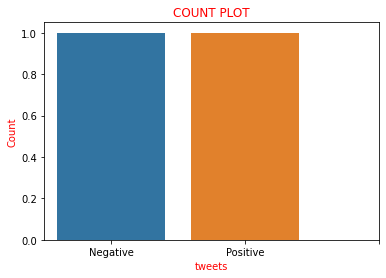

In [ ]:
sns.countplot([0,4])
plt.xlabel('tweets', color = 'red')
plt.ylabel('Count', color = 'red')
plt.xticks([0,1,2],['Negative','Positive'])
plt.title('COUNT PLOT', color = 'r')
plt.show()

In [ ]:
import re

In [ ]:
def remove_handle(input_tweets,handle):
  r= re.findall(handle, input_tweets)
  for i in r:
    input_tweets = re.sub(i, '', input_tweets)
  return input_tweets

In [ ]:
data['clean_tweets'] = np.vectorize(remove_handle)(data['tweets'], "@[\w]*")

In [ ]:
data['clean_tweets'].str.replace("[^a-zA-Z#]"," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


1100001     you guys are animal  hope you come to ireland...
1100002    Woot  If i dont respond to any tweets texts it...
1100003    At   s house  getting ready to go to ayr   mee...
1100004    Lot of  household  work to do but I sneaked ou...
1100005     Oooh    nice   I thought you meant Bug or Pla...
                                 ...                        
1599994    Just woke up  Having no school is the best fee...
1599995    TheWDB com   Very cool to hear old Walt interv...
1599996    Are you ready for your MoJo Makeover  Ask me f...
1599997    Happy   th Birthday to my boo of alll time    ...
1599998                            happy #charitytuesday    
Name: clean_tweets, Length: 499998, dtype: object

In [ ]:
data.head()

,target,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,tweets,clean_tweets
1100001,4,1970621855,Sat May 30 04:35:55 PDT 2009,NO_QUERY,IrishMcflyFan,@BoyceAvenue you guys are animal hope you com...,you guys are animal hope you come to ireland...
1100002,4,1970621869,Sat May 30 04:35:56 PDT 2009,NO_QUERY,MrsArchuletaa,Woot! If i dont respond to any tweets/texts it...,Woot! If i dont respond to any tweets/texts it...
1100003,4,1970621894,Sat May 30 04:35:56 PDT 2009,NO_QUERY,ashleighxgebbie,At @gemma02 's house getting ready to go to a...,At 's house getting ready to go to ayr + mee...
1100004,4,1970621908,Sat May 30 04:35:56 PDT 2009,NO_QUERY,Marika002,Lot of (household) work to do but I sneaked ou...,Lot of (household) work to do but I sneaked ou...
1100005,4,1970621944,Sat May 30 04:35:57 PDT 2009,NO_QUERY,brianwelburn,@Zatannna Oooh ! nice ! I thought you meant B...,Oooh ! nice ! I thought you meant Bug or Pla...


In [ ]:
data['clean_tweets'].str.lower()

1100001     you guys are animal  hope you come to ireland...
1100002    woot! if i dont respond to any tweets/texts it...
1100003    at  's house  getting ready to go to ayr + mee...
1100004    lot of (household) work to do but i sneaked ou...
1100005     oooh !  nice ! i thought you meant bug or pla...
                                 ...                        
1599994    just woke up. having no school is the best fee...
1599995    thewdb.com - very cool to hear old walt interv...
1599996    are you ready for your mojo makeover? ask me f...
1599997    happy 38th birthday to my boo of alll time!!! ...
1599998                            happy #charitytuesday    
Name: clean_tweets, Length: 499998, dtype: object

In [ ]:
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data['clean_tweets'] = data['clean_tweets'].apply(word_tokenize)

In [ ]:
data.head()

,target,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,tweets,clean_tweets
1100001,4,1970621855,Sat May 30 04:35:55 PDT 2009,NO_QUERY,IrishMcflyFan,@BoyceAvenue you guys are animal hope you com...,"[you, guys, are, animal, hope, you, come, to, ..."
1100002,4,1970621869,Sat May 30 04:35:56 PDT 2009,NO_QUERY,MrsArchuletaa,Woot! If i dont respond to any tweets/texts it...,"[Woot, !, If, i, dont, respond, to, any, tweet..."
1100003,4,1970621894,Sat May 30 04:35:56 PDT 2009,NO_QUERY,ashleighxgebbie,At @gemma02 's house getting ready to go to a...,"[At, 's, house, getting, ready, to, go, to, ay..."
1100004,4,1970621908,Sat May 30 04:35:56 PDT 2009,NO_QUERY,Marika002,Lot of (household) work to do but I sneaked ou...,"[Lot, of, (, household, ), work, to, do, but, ..."
1100005,4,1970621944,Sat May 30 04:35:57 PDT 2009,NO_QUERY,brianwelburn,@Zatannna Oooh ! nice ! I thought you meant B...,"[Oooh, !, nice, !, I, thought, you, meant, Bug..."


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
data['clean_tweets'] = data['clean_tweets'].apply(lambda x: [word for word in x if word not in (stop_words)])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data.head()

,target,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,tweets,clean_tweets
1100001,4,1970621855,Sat May 30 04:35:55 PDT 2009,NO_QUERY,IrishMcflyFan,@BoyceAvenue you guys are animal hope you com...,"[guys, animal, hope, come, ireland, sometime, ..."
1100002,4,1970621869,Sat May 30 04:35:56 PDT 2009,NO_QUERY,MrsArchuletaa,Woot! If i dont respond to any tweets/texts it...,"[Woot, !, If, dont, respond, tweets/texts, cuz..."
1100003,4,1970621894,Sat May 30 04:35:56 PDT 2009,NO_QUERY,ashleighxgebbie,At @gemma02 's house getting ready to go to a...,"[At, 's, house, getting, ready, go, ayr, +, me..."
1100004,4,1970621908,Sat May 30 04:35:56 PDT 2009,NO_QUERY,Marika002,Lot of (household) work to do but I sneaked ou...,"[Lot, (, household, ), work, I, sneaked, timeo..."
1100005,4,1970621944,Sat May 30 04:35:57 PDT 2009,NO_QUERY,brianwelburn,@Zatannna Oooh ! nice ! I thought you meant B...,"[Oooh, !, nice, !, I, thought, meant, Bug, Pla..."


In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [ ]:
data['clean_tweets'] = data['clean_tweets'].apply(lambda x: [stemmer.stem(y) for y in x]) 

In [ ]:
data.head()

,target,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,tweets,clean_tweets
1100001,4,1970621855,Sat May 30 04:35:55 PDT 2009,NO_QUERY,IrishMcflyFan,@BoyceAvenue you guys are animal hope you com...,"[guy, anim, hope, come, ireland, sometim, !, g..."
1100002,4,1970621869,Sat May 30 04:35:56 PDT 2009,NO_QUERY,MrsArchuletaa,Woot! If i dont respond to any tweets/texts it...,"[woot, !, if, dont, respond, tweets/text, cuz,..."
1100003,4,1970621894,Sat May 30 04:35:56 PDT 2009,NO_QUERY,ashleighxgebbie,At @gemma02 's house getting ready to go to a...,"[at, 's, hous, get, readi, go, ayr, +, meet, l..."
1100004,4,1970621908,Sat May 30 04:35:56 PDT 2009,NO_QUERY,Marika002,Lot of (household) work to do but I sneaked ou...,"[lot, (, household, ), work, i, sneak, timeout..."
1100005,4,1970621944,Sat May 30 04:35:57 PDT 2009,NO_QUERY,brianwelburn,@Zatannna Oooh ! nice ! I thought you meant B...,"[oooh, !, nice, !, i, thought, meant, bug, pla..."


In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

data['clean_tweets'] = data['clean_tweets'].apply(lemmatize_text)

In [ ]:
data['clean_tweets'].head(25)

1100001    [guy, anim, hope, come, ireland, sometim, !, g...
1100002    [woot, !, if, dont, respond, tweets/text, cuz,...
1100003    [at, 's, hous, get, readi, go, ayr, +, meet, l...
1100004    [lot, (, household, ), work, i, sneak, timeout...
1100005    [oooh, !, nice, !, i, thought, meant, bug, pla...
1100006    [go, aunt, 's, graduat, cop, school, ..., get,...
1100007     [i, dunno, get, ,, pas, way, ..., i, keep, lose]
1100008    [eat, chocol, browni, i, bake, school, fete, lol]
1100009       [thank, ,, joe, ., i, appreci, #, ff, mention]
1100010                                              [lunch]
1100011    [gorgeous, sunni, saturday, ., prospect, park,...
1100012    [me, ,, i, realli, *, need, *, visit, comiccon...
1100013    [just, got, ., concert, today, !, !, !, !, hav...
1100014           [mad, !, thank, pop, hope, bump, enjoy, !]
1100015    [zeus, interview, good, ;, fare, better, aphro...
1100016    [mornin, ', havin, ', bbq, today, !, yum, ., w...
1100017                 

In [ ]:
clean_text = data['clean_tweets']

In [ ]:
data['clean_tweets']

1100001    [guy, anim, hope, come, ireland, sometim, !, g...
1100002    [woot, !, if, dont, respond, tweets/text, cuz,...
1100003    [at, 's, hous, get, readi, go, ayr, +, meet, l...
1100004    [lot, (, household, ), work, i, sneak, timeout...
1100005    [oooh, !, nice, !, i, thought, meant, bug, pla...
                                 ...                        
1599994      [just, woke, ., have, school, best, feel, ever]
1599995    [thewdb.com, -, veri, cool, hear, old, walt, i...
1599996           [are, readi, mojo, makeov, ?, ask, detail]
1599997    [happi, 38th, birthday, boo, alll, time, !, !,...
1599998                           [happi, #, charitytuesday]
Name: clean_tweets, Length: 499998, dtype: object

In [ ]:
for i in range(len(data['clean_tweets'])):
    data['clean_tweets'][i+1100001] = ' '.join(data['clean_tweets'][i+1100001])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data.head()

,target,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,tweets,clean_tweets
1100001,4,1970621855,Sat May 30 04:35:55 PDT 2009,NO_QUERY,IrishMcflyFan,@BoyceAvenue you guys are animal hope you com...,guy anim hope come ireland sometim ! good luck !
1100002,4,1970621869,Sat May 30 04:35:56 PDT 2009,NO_QUERY,MrsArchuletaa,Woot! If i dont respond to any tweets/texts it...,woot ! if dont respond tweets/text cuz im beach .
1100003,4,1970621894,Sat May 30 04:35:56 PDT 2009,NO_QUERY,ashleighxgebbie,At @gemma02 's house getting ready to go to a...,at 's hous get readi go ayr + meet laurz 'm lo...
1100004,4,1970621908,Sat May 30 04:35:56 PDT 2009,NO_QUERY,Marika002,Lot of (household) work to do but I sneaked ou...,"lot ( household ) work i sneak timeout , relax..."
1100005,4,1970621944,Sat May 30 04:35:57 PDT 2009,NO_QUERY,brianwelburn,@Zatannna Oooh ! nice ! I thought you meant B...,oooh ! nice ! i thought meant bug plank ! sorr...


In [ ]:
  
# saving the dataframe
data.to_csv(r'/content/drive/My Drive/ML/clean_tweets.csv',mode = 'a', index=False, header = False)